In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latlong=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        latlong.append(lat_lng)
# Print the city count to confirm sufficient count
len(cities)

645

In [3]:
temperature =[]
humidity=[]
cloudiness=[]
wind_speed=[]
countries = []
datetime= []
count=0

for city in cities:
    # Build query URL
    count =  count + 1
    try:
        query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units=imperial"
        data = requests.get(query_url).json()
        
        #pull data
        temp= data["main"]["temp"]
        humid= data["main"]["humidity"]
        cloud= data["clouds"]["all"]
        wind= data["wind"]["speed"]
        country=data["sys"]["country"]
        timezone= data["timezone"]
    
       #append item to list
        temperature.append(temp)
        humidity.append(humid)
        cloudiness.append(cloud)
        wind_speed.append(wind)
        countries.append(country)
        datetime.append(timezone)
        
        #print log
        print(f"Record {count} processed: {city}")

    except:
        print(f"Error: {city} not found")
        temperature.append("n/a")
        humidity.append("n/a")
        cloudiness.append("n/a")
        wind_speed.append("n/a")
        countries.append("n/a")
        datetime.append("n/a")
    
    time.sleep(1)
    

    

Record 1 processed: mataura
Record 2 processed: rikitea
Record 3 processed: bastrop
Record 4 processed: hobart
Record 5 processed: pacific grove
Record 6 processed: maceio
Record 7 processed: jalingo
Error: saleaula not found
Record 9 processed: sisimiut
Record 10 processed: vera cruz
Record 11 processed: meadow lake
Record 12 processed: ribeira grande
Record 13 processed: narsaq
Error: attawapiskat not found
Record 15 processed: imeni babushkina
Record 16 processed: busselton
Record 17 processed: vernon
Record 18 processed: butaritari
Record 19 processed: xichang
Record 20 processed: port alfred
Record 21 processed: tual
Error: kuche not found
Record 23 processed: norman wells
Record 24 processed: namibe
Record 25 processed: bambous virieux
Record 26 processed: calbuco
Record 27 processed: cape town
Record 28 processed: matara
Record 29 processed: bluff
Record 30 processed: tucurui
Record 31 processed: east london
Record 32 processed: lagoa
Record 33 processed: mayo
Record 34 processe

Record 272 processed: salinas
Record 273 processed: manaus
Record 274 processed: darnah
Record 275 processed: tabas
Record 276 processed: port macquarie
Record 277 processed: myitkyina
Record 278 processed: camapua
Record 279 processed: georgiyevka
Record 280 processed: zabid
Record 281 processed: taraz
Record 282 processed: morondava
Record 283 processed: victor harbor
Record 284 processed: tiarei
Record 285 processed: rincon
Record 286 processed: miraflores
Record 287 processed: nyurba
Record 288 processed: sawai madhopur
Record 289 processed: kindu
Record 290 processed: hualmay
Record 291 processed: cotonou
Record 292 processed: ailigandi
Record 293 processed: arraial do cabo
Record 294 processed: izhevskoye
Record 295 processed: constitucion
Record 296 processed: mindelo
Record 297 processed: san fernando
Record 298 processed: north bend
Record 299 processed: ilulissat
Record 300 processed: chokurdakh
Record 301 processed: rocha
Record 302 processed: cidreira
Record 303 processed: 

Record 538 processed: totma
Record 539 processed: port-cartier
Record 540 processed: vryburg
Record 541 processed: maragogi
Record 542 processed: lisala
Record 543 processed: saint george
Record 544 processed: villa rica
Record 545 processed: broome
Record 546 processed: fukue
Record 547 processed: codrington
Record 548 processed: ekhabi
Record 549 processed: great yarmouth
Error: satitoa not found
Record 551 processed: irbil
Record 552 processed: saldanha
Error: ziyamet not found
Record 554 processed: barabai
Error: alotau not found
Record 556 processed: barcelos
Record 557 processed: turan
Error: yirol not found
Record 559 processed: lavrentiya
Record 560 processed: turayf
Record 561 processed: katsuura
Record 562 processed: kupang
Record 563 processed: los llanos de aridane
Record 564 processed: sucua
Record 565 processed: poum
Record 566 processed: ekuvukeni
Error: aflu not found
Record 568 processed: kampene
Record 569 processed: nivala
Record 570 processed: quelimane
Record 571 p

In [4]:
# see data response
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q=London&units=imperial"
data = requests.get(query_url).json()
data


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 41.94,
  'feels_like': 39.04,
  'temp_min': 37.27,
  'temp_max': 44.35,
  'pressure': 1023,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 60},
 'clouds': {'all': 96},
 'dt': 1647320144,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1647324902,
  'sunset': 1647367441},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
#unzip latitude and longitude from each other
#https://www.kite.com/python/answers/how-to-unzip-a-list-of-tuples-in-python

unzipped_object = zip(*latlong)
unzipped_list = list(unzipped_object)


In [6]:
#data frame
df=pd.DataFrame()
df["city"]=cities
df["lat_long"]=latlong
df["latitude"]=unzipped_list[0]
df["longitude"]=unzipped_list[1]
df["temperature"]=temperature
df["humidity"]=humidity
df["cloudiness"]=cloudiness
df["wind_speed"]=wind_speed
df['country']= country
df["timezone"]= datetime
df

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone
0,mataura,"(-68.50616938544948, -150.37774696327926)",-68.506169,-150.377747,52.48,87,100,5.39,JP,46800
1,rikitea,"(-30.681296696126786, -126.3156960749132)",-30.681297,-126.315696,79.88,75,100,18.32,JP,-32400
2,bastrop,"(32.77746126426588, -91.42701947008482)",32.777461,-91.427019,56.26,79,100,1.01,JP,-18000
3,hobart,"(-76.49871141133052, 152.14258100215392)",-76.498711,152.142581,65.3,94,75,8.05,JP,39600
4,pacific grove,"(26.160659046051506, -137.22124631442136)",26.160659,-137.221246,55.09,74,75,4.61,JP,-25200
...,...,...,...,...,...,...,...,...,...,...
640,ramona,"(33.186424435561705, -116.62408876317744)",33.186424,-116.624089,53.62,76,0,0,JP,-25200
641,tura,"(66.23404218169031, 99.14212871649107)",66.234042,99.142129,92.95,12,0,5.5,JP,19800
642,witu,"(-2.2018672667641113, 39.40775744690046)",-2.201867,39.407757,78.49,76,99,2.53,JP,10800
643,misratah,"(33.49204569393403, 16.076769507459915)",33.492046,16.076770,57.85,72,0,15.7,JP,7200


In [7]:
#clean up

#drop n/a
mask = df.temperature != "n/a"
df2= df.loc[mask]

df2


,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone
0,mataura,"(-68.50616938544948, -150.37774696327926)",-68.506169,-150.377747,52.48,87,100,5.39,JP,46800
1,rikitea,"(-30.681296696126786, -126.3156960749132)",-30.681297,-126.315696,79.88,75,100,18.32,JP,-32400
2,bastrop,"(32.77746126426588, -91.42701947008482)",32.777461,-91.427019,56.26,79,100,1.01,JP,-18000
3,hobart,"(-76.49871141133052, 152.14258100215392)",-76.498711,152.142581,65.3,94,75,8.05,JP,39600
4,pacific grove,"(26.160659046051506, -137.22124631442136)",26.160659,-137.221246,55.09,74,75,4.61,JP,-25200
...,...,...,...,...,...,...,...,...,...,...
640,ramona,"(33.186424435561705, -116.62408876317744)",33.186424,-116.624089,53.62,76,0,0,JP,-25200
641,tura,"(66.23404218169031, 99.14212871649107)",66.234042,99.142129,92.95,12,0,5.5,JP,19800
642,witu,"(-2.2018672667641113, 39.40775744690046)",-2.201867,39.407757,78.49,76,99,2.53,JP,10800
643,misratah,"(33.49204569393403, 16.076769507459915)",33.492046,16.076770,57.85,72,0,15.7,JP,7200


In [8]:
#drop when humidity exceeds 100 (for every pull from api)
mask = df2.humidity <= 100
df3 = df2.loc[mask]
df3

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone
0,mataura,"(-68.50616938544948, -150.37774696327926)",-68.506169,-150.377747,52.48,87,100,5.39,JP,46800
1,rikitea,"(-30.681296696126786, -126.3156960749132)",-30.681297,-126.315696,79.88,75,100,18.32,JP,-32400
2,bastrop,"(32.77746126426588, -91.42701947008482)",32.777461,-91.427019,56.26,79,100,1.01,JP,-18000
3,hobart,"(-76.49871141133052, 152.14258100215392)",-76.498711,152.142581,65.3,94,75,8.05,JP,39600
4,pacific grove,"(26.160659046051506, -137.22124631442136)",26.160659,-137.221246,55.09,74,75,4.61,JP,-25200
...,...,...,...,...,...,...,...,...,...,...
640,ramona,"(33.186424435561705, -116.62408876317744)",33.186424,-116.624089,53.62,76,0,0,JP,-25200
641,tura,"(66.23404218169031, 99.14212871649107)",66.234042,99.142129,92.95,12,0,5.5,JP,19800
642,witu,"(-2.2018672667641113, 39.40775744690046)",-2.201867,39.407757,78.49,76,99,2.53,JP,10800
643,misratah,"(33.49204569393403, 16.076769507459915)",33.492046,16.076770,57.85,72,0,15.7,JP,7200


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 644
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         588 non-null    object 
 1   lat_long     588 non-null    object 
 2   latitude     588 non-null    float64
 3   longitude    588 non-null    float64
 4   temperature  588 non-null    object 
 5   humidity     588 non-null    object 
 6   cloudiness   588 non-null    object 
 7   wind_speed   588 non-null    object 
 8   country      588 non-null    object 
 9   timezone     588 non-null    object 
dtypes: float64(2), object(8)
memory usage: 50.5+ KB


In [10]:
#make objects into floats


df3.temperature = df3.temperature.astype(float)
df3.humidity= df3.humidity.astype(float)
df3.cloudiness= df3.cloudiness.astype(float)
df3.wind_speed = df3.wind_speed.astype(float)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 644
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         588 non-null    object 
 1   lat_long     588 non-null    object 
 2   latitude     588 non-null    float64
 3   longitude    588 non-null    float64
 4   temperature  588 non-null    float64
 5   humidity     588 non-null    float64
 6   cloudiness   588 non-null    float64
 7   wind_speed   588 non-null    float64
 8   country      588 non-null    object 
 9   timezone     588 non-null    object 
dtypes: float64(6), object(4)
memory usage: 50.5+ KB


# Scatter plots

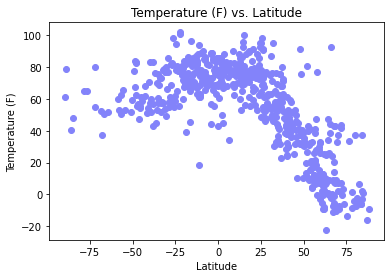

Scatter plot shows the relationship between temperature (F) and latitude. In the Southern Hemisphere, temperature stays roughly between 60-100 (F) and in the Northern Hemisphere, the temperature roughly decreases as the latitude increases.


In [11]:
#scatterplots: Temperature (F) vs. Latitude

plt.scatter(df3.latitude, df3.temperature, color="#8383fa")

#axis titles
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

#export to png
plt.savefig("Images/Temperature (F) vs. Latitude.png")

plt.show()



print(f"Scatter plot shows the relationship between temperature (F) and latitude. In the Southern Hemisphere, temperature stays roughly between 60-100 (F) and in the Northern Hemisphere, the temperature roughly decreases as the latitude increases.")
      

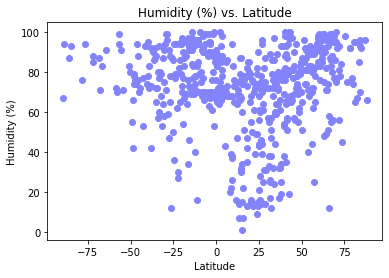

Scatter plot shows the relationship between humidity and latitude.


In [27]:
#scatterplots: Humidity (%) vs. Latitude

plt.scatter(df3.latitude, df3.humidity, color="#8383fa")

#export to png
plt.savefig("Images/Humidity vs Latitude.png")

#axis titles
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()



print(f"Scatter plot shows the relationship between humidity and latitude.")


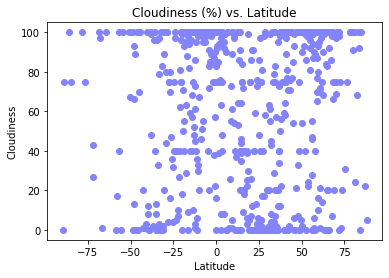

Scatter plot shows the relationship between cloudiness (%) and latitude.


In [13]:
#scatterplots: Cloudiness (%) vs. Latitude

plt.scatter(df3.latitude, df3.cloudiness, color="#8383fa")

#axis titles
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#export to png
plt.savefig("Images/Cloudiness vs. Latitude.png")

plt.show()



print(f"Scatter plot shows the relationship between cloudiness (%) and latitude.")

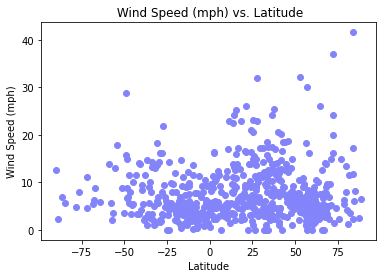

Scatter plot shows the relationship between wind speed (mph) and latitude.


In [14]:
#scatterplots:  Wind Speed (mph) vs. Latitude

plt.scatter(df3.latitude, df3.wind_speed, color="#8383fa")

#axis titles
plt.title(' Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#export to png
plt.savefig("Images/Wind Speed (mph) vs. Latitude.png")

plt.show()



#print statement on scatterplot
print(f"Scatter plot shows the relationship between wind speed (mph) and latitude.")

# Bins for Hemisphere

In [15]:
#binning

bins= [-5000, -0.00001, 5000]

group_names= ["Southern", "Northern"]

df3["Hemisphere"] = pd.cut(df3["latitude"], bins, labels=group_names, include_lowest=True)
df3

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone,Hemisphere
0,mataura,"(-68.50616938544948, -150.37774696327926)",-68.506169,-150.377747,52.48,87.0,100.0,5.39,JP,46800,Southern
1,rikitea,"(-30.681296696126786, -126.3156960749132)",-30.681297,-126.315696,79.88,75.0,100.0,18.32,JP,-32400,Southern
2,bastrop,"(32.77746126426588, -91.42701947008482)",32.777461,-91.427019,56.26,79.0,100.0,1.01,JP,-18000,Northern
3,hobart,"(-76.49871141133052, 152.14258100215392)",-76.498711,152.142581,65.30,94.0,75.0,8.05,JP,39600,Southern
4,pacific grove,"(26.160659046051506, -137.22124631442136)",26.160659,-137.221246,55.09,74.0,75.0,4.61,JP,-25200,Northern
...,...,...,...,...,...,...,...,...,...,...,...
640,ramona,"(33.186424435561705, -116.62408876317744)",33.186424,-116.624089,53.62,76.0,0.0,0.00,JP,-25200,Northern
641,tura,"(66.23404218169031, 99.14212871649107)",66.234042,99.142129,92.95,12.0,0.0,5.50,JP,19800,Northern
642,witu,"(-2.2018672667641113, 39.40775744690046)",-2.201867,39.407757,78.49,76.0,99.0,2.53,JP,10800,Southern
643,misratah,"(33.49204569393403, 16.076769507459915)",33.492046,16.076770,57.85,72.0,0.0,15.70,JP,7200,Northern


In [16]:
#save data frame to csv
df3.to_csv("weather_data.csv", encoding="utf-8", index=False)

# Linear Regression

In [17]:
#create northern hemisphere data dataframe
mask = df3.Hemisphere == "Northern"
north = df3.loc[mask]
north.head()

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone,Hemisphere
2,bastrop,"(32.77746126426588, -91.42701947008482)",32.777461,-91.427019,56.26,79.0,100.0,1.01,JP,-18000,Northern
4,pacific grove,"(26.160659046051506, -137.22124631442136)",26.160659,-137.221246,55.09,74.0,75.0,4.61,JP,-25200,Northern
6,jalingo,"(8.143327886482595, 11.29609500210529)",8.143328,11.296095,77.38,20.0,26.0,4.83,JP,3600,Northern
8,sisimiut,"(67.25728196051793, -53.27662608581909)",67.257282,-53.276626,-10.86,97.0,100.0,14.09,JP,-10800,Northern
10,meadow lake,"(57.303874623559835, -107.94628267576961)",57.303875,-107.946283,47.71,25.0,1.0,2.73,JP,-21600,Northern


In [18]:
#create southern hemisphere data dataframe
mask = df3.Hemisphere == "Southern"
south = df3.loc[mask]
south.head()

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone,Hemisphere
0,mataura,"(-68.50616938544948, -150.37774696327926)",-68.506169,-150.377747,52.48,87.0,100.0,5.39,JP,46800,Southern
1,rikitea,"(-30.681296696126786, -126.3156960749132)",-30.681297,-126.315696,79.88,75.0,100.0,18.32,JP,-32400,Southern
3,hobart,"(-76.49871141133052, 152.14258100215392)",-76.498711,152.142581,65.30,94.0,75.0,8.05,JP,39600,Southern
5,maceio,"(-15.115220836365552, -29.84354513670769)",-15.115221,-29.843545,74.64,94.0,40.0,4.61,JP,-10800,Southern
9,vera cruz,"(-13.104316277356219, -41.159544083194845)",-13.104316,-41.159544,68.20,93.0,52.0,2.17,JP,-10800,Southern


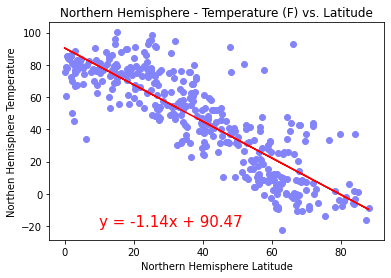

There is a negative correlation between latitude and temperature. The more north, the more the temperature decreases.


In [19]:
# linear regression for Northern Hemisphere - Temperature (F) vs. Latitude

#resource for error: https://stackify.dev/843433-attributeerror-float-object-has-no-attribute-shape-when-using-linregress
# Add the linear regression equation and line to plot
x_values = north["latitude"]
y_values = north["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northen Hemisphere Temperature')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')


#export to png
plt.savefig("Images/Northern Hemisphere - Temperature (F) vs. Latitude.png")

plt.show()
#explanation
print(f"There is a negative correlation between latitude and temperature. The more north, the more the temperature decreases.")


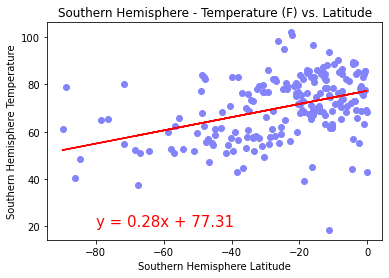

There is a positive correlation between latitude and temperature in the southern hemisphere. The more south, the more the temperature increases.


In [20]:
# linear regression for Southern Hemisphere - Temperature (F) vs. Latitude

# Add the linear regression equation and line to plot
x_values = south["latitude"]
y_values = south["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Temperature')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')


#export to png
plt.savefig("Images/Southern Hemisphere - Temperature (F) vs. Latitude.png")

plt.show()
#explanation
print(f"There is a positive correlation between latitude and temperature in the southern hemisphere. The more south, the more the temperature increases.")


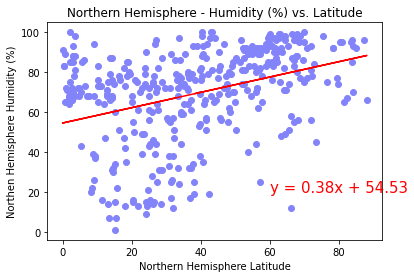

There is a positive correlation between latitude and humidity in the northern hemisphere. The more north, the more the humidity increases.


In [21]:
# linear regression for Northern Hemisphere - Humidity (%) vs. Latitude

# Add the linear regression equation and line to plot
x_values = north["latitude"]
y_values = north["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northen Hemisphere Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')

#export to png
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

#explanation
print(f"There is a positive correlation between latitude and humidity in the northern hemisphere. The more north, the more the humidity increases.")


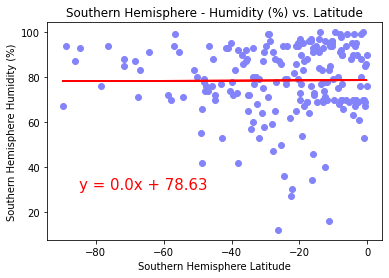

There is a positive correlation between latitude and humidity in the southern hemisphere. The more south, the more the humidity increases, though to a lesser degree than in the north.


In [22]:
# linear regression for Southern Hemisphere - Humidity (%) vs. Latitude

# Add the linear regression equation and line to plot
x_values = south["latitude"]
y_values = south["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-85,30),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')


#export to png
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()

#explanation
print(f"There is a positive correlation between latitude and humidity in the southern hemisphere. The more south, the more the humidity increases, though to a lesser degree than in the north.")


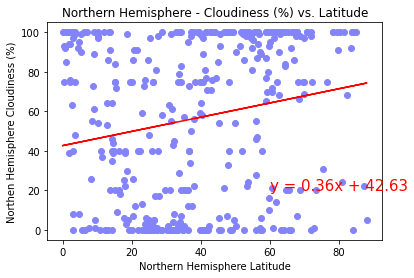

There is a positive correlation between latitude and cloudiness (%) in the northern hemisphere, but the line of regression is not meaningfully predictive.


In [23]:
# linear regression for Northern Hemisphere - Cloudiness (%) vs. Latitude


# Add the linear regression equation and line to plot
x_values = north["latitude"]
y_values = north["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northen Hemisphere Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')



#export to png
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

plt.show()
#explanation
print(f"There is a positive correlation between latitude and cloudiness (%) in the northern hemisphere, but the line of regression is not meaningfully predictive.")


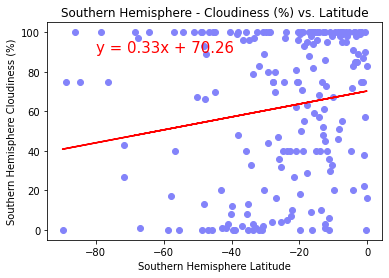

There is a positive correlation between latitude and cloudiness (%) in the southern hemisphere, but the line of regression is not meaningfully predictive.


In [24]:
# linear regression for Southern Hemisphere - Cloudiness (%) vs. Latitude


# Add the linear regression equation and line to plot
x_values = south["latitude"]
y_values = south["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,90),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')


#export to png
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()
#explanation
print(f"There is a positive correlation between latitude and cloudiness (%) in the southern hemisphere, but the line of regression is not meaningfully predictive.")


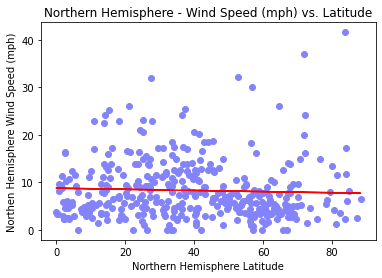

There is a minor positive correlation between latitude and wind speed (mph) in the northern hemisphere.


In [25]:
# linear regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude


# Add the linear regression equation and line to plot
x_values = north["latitude"]
y_values = north["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northen Hemisphere Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')



#export to png
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()
#explanation
print(f"There is a minor positive correlation between latitude and wind speed (mph) in the northern hemisphere.")


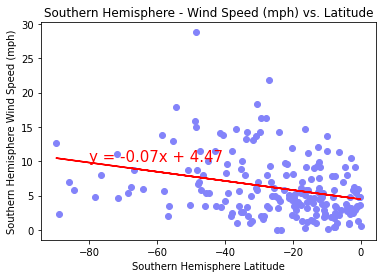

There is a minor positive correlation between latitude and wind speed (mph) in the southern hemisphere, but the line of regression does not correlate well to the data.


In [26]:
# linear regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude


# Add the linear regression equation and line to plot
x_values = south["latitude"]
y_values = south["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')

#export to png
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()


#explanation
print(f"There is a minor positive correlation between latitude and wind speed (mph) in the southern hemisphere, but the line of regression does not correlate well to the data.")


Resources:
https://openweathermap.org/api/one-call-api
https://www.kite.com/python/answers/how-to-unzip-a-list-of-tuples-in-python 
https://stackify.dev/843433-attributeerror-float-object-has-no-attribute-shape-when-using-linregress